<a href="https://colab.research.google.com/github/Manojpatil123/Machine-learning-Assignments/blob/main/Assignment_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> Your task is to predict whether a message will be spam or not. In the class we used the <code>sklearn.countvectorizer</code> to find vectors for each message. Now you need to do the same task but rather than using countvectorizer, you are required to use TF-IDF vectorizer to find the vectors for the messages. </b>

### You will use <code>tfidfVectorizer</code>. It will convert collection of text documents (SMS corpus) into 2D matrix. One dimension represent documents and other dimension repesents each unique word in SMS corpus.

### If $n^{th}$ term $t$ has occured $p$ times in $m^{th}$ document, $(m, n)$ value in this matrix will be $\rm TF-IDF(t)$, where 
$\rm TF-IDF(t) = \rm Term ~Frequency (TF) * \rm Inverse~ Document ~Frequency (IDF)$
* ### <b>Term Frequency (TF)</b> is a measure of how frequent a term occurs in a document.

* ### $TF(t)$= Number of times term $t$ appears in document ($p$) / Total number of terms in that document

* ### <b>Inverse Document Frequency (IDF)</b> is measure of how important term is. For TF, all terms are equally treated. But, in IDF, for words that occur frequently like 'is' 'the' 'of' are assigned less weight. While terms that occur rarely that can easily help identify class of input features will be weighted high.

* ###  $IDF(t)= log(\frac{\rm Total ~ number ~ of ~document}{ Number ~of~ documents~ with ~term ~t ~in~ it})$

### At end we will have for every message, vectors normalized to unit length equal to size of vocabulary (number of unique terms from entire SMS corpus)





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
message = pd.read_csv('/content/drive/MyDrive/data/spam.csv', encoding='latin-1')[['v1', 'v2']]
message.columns = ['label', 'message']
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
message.shape

(5572, 2)

In [ ]:
message['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

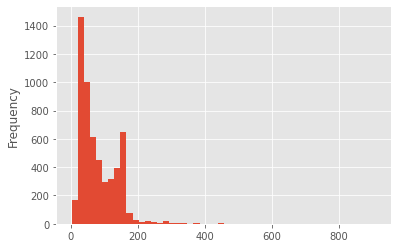

In [ ]:
message['length'].plot(bins=50,kind='hist')

In [ ]:
message.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
message[message['length']==120]['message'].iloc[0]

'SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
message['tokenized_message'] = message['message'].apply(text_process)

In [ ]:
message.head()

,label,message,length,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,Nah dont think goes usf lives around though


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(message['tokenized_message'])

In [ ]:
X.toarray()[4560]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36644381, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
print(vectorizer.get_feature_names())

['0800', '08000839402', '08000930705', '10', '100', '1000', '10p', '12', '12hrs', '150', '150p', '150pm', '150pmsg', '150ppm', '16', '18', '1st', '200', '2000', '2003', '250', '2nd', '300', '350', '500', '5000', '750', '800', '8007', '86688', '87066', 'abiola', 'able', 'abt', 'account', 'across', 'actually', 'address', 'admirer', 'aft', 'afternoon', 'age', 'ago', 'ah', 'aight', 'almost', 'alone', 'already', 'alright', 'also', 'always', 'amp', 'angry', 'another', 'ans', 'answer', 'anyone', 'anything', 'anytime', 'anyway', 'apply', 'ard', 'area', 'around', 'asap', 'ask', 'askd', 'asked', 'asking', 'ass', 'attempt', 'auction', 'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b4', 'babe', 'baby', 'back', 'bad', 'bank', 'bath', 'bathe', 'bcoz', 'bday', 'beautiful', 'bed', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bonus', 'book', 'booked', 'bored', 'bout', 'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bslvyl', 'bt', 'bus', 'busy', 'buy', 'call', 'called', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


872

In [ ]:
X.toarray().shape

(5572, 872)

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
message.iloc[4065]['tokenized_message']

'Fyi Im gonna call sporadically starting like ltgt bc doin shit'

In [ ]:
sum(X.toarray()[4065])

2.5534806458110557

In [ ]:
X.toarray()[4065]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
sum(X.toarray()[4560])

3.1061993467941194

In [ ]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(message['tokenized_message'],message['label'],test_size=0.2)

In [ ]:
msg_train.head()

843     Urgent call 09066350750 landline complimentary 4 Ibiza Holiday 10000 cash await collection SAE TCs PO BOX 434 SK3 8WP 150 ppm 18
4778    cant see join denis mina denis want alone time                                                                                  
4473    Want explicit SEX 30 secs Ring 02073162414 Costs 20pmin                                                                         
138     Youll rcv msgs chat svc FREE Hardcore services text GO 69988 u get nothing u must Age Verify yr network try                     
3038    Wishing family Merry X mas HAPPY NEW Year advance                                                                               
Name: tokenized_message, dtype: object

In [ ]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [ ]:
train_vectorized

<4457x872 sparse matrix of type '<class 'numpy.float64'>'
	with 24429 stored elements in Compressed Sparse Row format>

In [ ]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(train_array,label_train)

In [ ]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Confusion matrices for train and test 

print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[2952  901]
 [   0  604]]
[[742 230]
 [  8 135]]


In [ ]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

         ham       1.00      0.77      0.87      3853
        spam       0.40      1.00      0.57       604

    accuracy                           0.80      4457
   macro avg       0.70      0.88      0.72      4457
weighted avg       0.92      0.80      0.83      4457



              precision    recall  f1-score   support

         ham       0.99      0.76      0.86       972
        spam       0.37      0.94      0.53       143

    accuracy                           0.79      1115
   macro avg       0.68      0.85      0.70      1115
weighted avg       0.91      0.79      0.82      1115

